# The importance of understanding the chemicals

Efficient access to molecular information is vital for scientific analysis and understanding. Traditional methods of data retrieval often involve manual processes, which can be time-consuming and prone to errors, sometimes yielding no results at all.

Our Jupyter notebook introduces a solution: a code designed to extract molecular insights directly from molecule names. This code offers a streamlined approach, enabling users to swiftly obtain crucial details about chemical structure, chirality, and ring composition as well as other key metrics.

Through this notebook, we highlight the importance, functionality, and uniqueness of our molecular information extraction code. By leveraging its various functions, researchers can accelerate their analyses and deepen their understanding of molecular properties. Furthermore, the visual aid provided by our extension enhances comprehension when working with molecules.

We believe that this code and extension will assist scientific research efforts, providing researchers with tools for comprehending the molecules they work with and extracting further information when examining scientific literature.

# Extracting basic information from the name of the molecule

To extract the SMILES notation from the name of a molecule, the code will utilize the PubChem database, a reliable source known for its vast collection of molecular information. While SMILES notation is commonly used in computational chemistry, it may not be as familiar to chemists who often identify molecules by their names. Therefore, the code prioritizes accepting molecule names as input, including trivial names like "Curcumin," CAS numbers, or systematic names.

This approach ensures user-friendliness and accessibility, catering to chemists who are more accustomed to referring to molecules by their names rather than their SMILES notation. By leveraging the PubChem database, the code guarantees the validity and accuracy of the extracted information, enhancing the reliability of the results obtained.

Given the completeness of the PubChem data base several other important information can be extracted from the name as shown down below, indicating some of the most crucial aspects of a molecules.

As demonstrated here, the code prints basic information for Curcumin, including the IUPAC name, SMILES code, molecular formula, and molar mass.

This initial function serves as a primary source of information for the molecule, providing the SMILES code, which will be used for further structural analysis.

In [170]:
import pubchempy as pcp # Imports the library containing the infos on the molecules
from rdkit import Chem

In [186]:
def get_compound_info(molecule_name, smarts_patterns):
    compounds = pcp.get_compounds(molecule_name, 'name') # Get compounds based on the molecule name

    if compounds:
        compound = compounds[0]  # Take the first result (assuming it's the correct one)
        iupac_name = compound.iupac_name
        smiles_code = compound.isomeric_smiles
        molar_mass = compound.molecular_weight
        atomic_formula = compound.molecular_formula
            
            # Retreaves the infos we want to display
        planar_molecule = Chem.MolFromSmiles(smiles_code)
            # Create a planar molecule object from the SMILES code
            
            
        stereo_centers = Chem.FindMolChiralCenters(planar_molecule, includeUnassigned=True)
        num_stereo_centers = len(stereo_centers)
        infos = {
            "iupac_name": iupac_name,
            "smiles_code": smiles_code,
            "molar_mass": molar_mass,
            "atomic_formula": atomic_formula,
            "planar_molecule": planar_molecule,
            "num_stereo_centers": num_stereo_centers,
            "stereo_centers": stereo_centers,
        }    
            
        return infos
    else:
        return{"error": "Compound not found"}

In [189]:
molecule_name = "Curcumin"
result = get_compound_info(molecule_name, smarts_patterns)
if result:
    print(f"IUPAC Name: {result['iupac_name']}")
    print(f"SMILES Code: {result['smiles_code']}")
    print(f"Atomic Formula: {result['atomic_formula']}")
    print(f"Molar Mass: {result['molar_mass']} g/mol")
    print(f"Number of Stereogenic Centers: {result['num_stereo_centers']}")
    print(f"Position of Stereogenic Centers: {result['stereo_centers']}")
else:
    print(f"No compound found for '{molecule_name}'")

IUPAC Name: (1E,6E)-1,7-bis(4-hydroxy-3-methoxyphenyl)hepta-1,6-diene-3,5-dione
SMILES Code: COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC(=C(C=C2)O)OC)O
Atomic Formula: C21H20O6
Molar Mass: 368.4 g/mol
Number of Stereogenic Centers: 0
Position of Stereogenic Centers: []


As shown here by the trivial name that is mostly used for this molecule the code will find its systematic IUPAC name as well as the smiles code, the atomic formula and its molar mass as well as the information about the chiral centers.

## IUPAC Name
When checking directly from the IUPAC name the code will as well print the expected results just as for its trivial name. 

In [198]:
molecule_name = "(1E,6E)-1,7-bis(4-hydroxy-3-methoxyphenyl)hepta-1,6-diene-3,5-dione"
result = get_compound_info(molecule_name, smarts_patterns)
if result:
    print(f"IUPAC Name: {result['iupac_name']}")
    print(f"SMILES Code: {result['smiles_code']}")
    print(f"Atomic Formula: {result['atomic_formula']}")
    print(f"Molar Mass: {result['molar_mass']} g/mol")
    print(f"Number of Stereogenic Centers: {result['num_stereo_centers']}")
    print(f"Position of Stereogenic Centers: {result['stereo_centers']}")
else:
    print(f"No compound found for '{molecule_name}'")

IUPAC Name: (1E,6E)-1,7-bis(4-hydroxy-3-methoxyphenyl)hepta-1,6-diene-3,5-dione
SMILES Code: COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC(=C(C=C2)O)OC)O
Atomic Formula: C21H20O6
Molar Mass: 368.4 g/mol
Number of Stereogenic Centers: 0
Position of Stereogenic Centers: []


## CAS Number
Even the CAS number can be used to extract the molecules information as shown down below. How cool is that?

In [194]:
molecule_name = "458-37-7"
result = get_compound_info(molecule_name, smarts_patterns)
if result:
    print(f"IUPAC Name: {result['iupac_name']}")
    print(f"SMILES Code: {result['smiles_code']}")
    print(f"Atomic Formula: {result['atomic_formula']}")
    print(f"Molar Mass: {result['molar_mass']} g/mol")
    print(f"Number of Stereogenic Centers: {result['num_stereo_centers']}")
    print(f"Position of Stereogenic Centers: {result['stereo_centers']}")
else:
    print(f"No compound found for '{molecule_name}'")

IUPAC Name: (1E,6E)-1,7-bis(4-hydroxy-3-methoxyphenyl)hepta-1,6-diene-3,5-dione
SMILES Code: COC1=C(C=CC(=C1)/C=C/C(=O)CC(=O)/C=C/C2=CC(=C(C=C2)O)OC)O
Atomic Formula: C21H20O6
Molar Mass: 368.4 g/mol
Number of Stereogenic Centers: 0
Position of Stereogenic Centers: []


## False name with Typo
However if the name of the molecule has a typo as here in "Crucumin" the code will raise the error that there is no such compouns.

In [197]:
molecule_name = "Crucumin"
result = get_compound_info(molecule_name, smarts_patterns)
if result:
    print(f"IUPAC Name: {result['iupac_name']}")
    print(f"SMILES Code: {result['smiles_code']}")
    print(f"Atomic Formula: {result['atomic_formula']}")
    print(f"Molar Mass: {result['molar_mass']} g/mol")
    print(f"Number of Stereogenic Centers: {result['num_stereo_centers']}")
    print(f"Position of Stereogenic Centers: {result['stereo_centers']}")
else:
    print(f"No compound found for '{molecule_name}'")

KeyError: 'iupac_name'

## Checking for isomeric strings for chiral molecules
Now, all this information can be verified and compared. The code consistently prints the same results for different names of the same molecule. If a typo occurs, the code will indicate that there is no molecule with that specific name in the database.

An important feature is that the code always prints the specific SMILES notation for the given isomer, which is crucial for other functions that rely on this output. For example, you can verify this by comparing D-Glucose to L-Glucose, as shown below.

In [27]:
molecule_name = "D-Glucose"
result = get_compound_info(molecule_name)
if result:
    print(f"IUPAC Name: {result['iupac_name']}")
    print(f"SMILES Code: {result['smiles_code']}")
    print(f"Atomic Formula: {result['atomic_formula']}")
    print(f"Molar Mass: {result['molar_mass']} g/mol")
    
else:
    print(f"No compound found for '{molecule_name}'")

IUPAC Name: (3R,4S,5S,6R)-6-(hydroxymethyl)oxane-2,3,4,5-tetrol
SMILES Code: C([C@@H]1[C@H]([C@@H]([C@H](C(O1)O)O)O)O)O
Atomic Formula: C6H12O6
Molar Mass: 180.16 g/mol


In [61]:
molecule_name = "L-Glucose"
result = get_compound_info(molecule_name)
if result:
    print(f"IUPAC Name: {result['iupac_name']}")
    print(f"SMILES Code: {result['smiles_code']}")
    print(f"Atomic Formula: {result['atomic_formula']}")
    print(f"Molar Mass: {result['molar_mass']} g/mol")
    
else:
    print(f"No compound found for '{molecule_name}'")

IUPAC Name: (2S,3R,4S,5S)-2,3,4,5,6-pentahydroxyhexanal
SMILES Code: C([C@@H]([C@@H]([C@H]([C@@H](C=O)O)O)O)O)O
Atomic Formula: C6H12O6
Molar Mass: 180.16 g/mol


# Finding Chemical groups in a molecule from the smiles

The first function of the code successfully finds the SMILES notation along with other key elements such as the molecule's IUPAC name, molecular formula, and molar mass. However, the rest of the code will primarily rely on the SMILES notation.

In scientific research and laboratory work, understanding the chemical groups present in a molecule is crucial, as these groups determine the molecule's behavior. This knowledge is especially important in synthesis labs, where considering all possible side reactions is essential for optimizing reaction conditions and achieving high yields.

The second function of our code identifies chemical groups within a molecule. It uses a dictionary of SMARTS patterns to find these groups in the molecule's SMILES notation and lists them in a dictionary. This function is critical for analyzing the chemical structure and predicting the molecule's reactivity.

## SMARTS

The specific SMARTS groups were carefully selected to minimize analysis errors. Using simple SMARTS patterns can lead to incorrect detections, such as identifying both a ketone and an alcohol in a carboxylic acid, which would not provide the qualitative outputs expected from this code.

It's important to note that the SMARTS list is not exhaustive and was primarily created manually. Additional chemical groups can be added if necessary. Due to the manual nature of this process, there is a possibility of errors, so each result should be reviewed carefully.

In [125]:
# SMARTS patterns to recognize chemical groups, better than smiles for multiple compnent groups like carboxylic acid, imide etc....
# The list is not at all complete and was mostly set up manually, many more groups could be added if necessary!
smarts_patterns = {
    '[C]=[C]': 'Alkene',
    '[CX2]#[CX2]': 'Alkyne',
    '[CX3]=[CX2]=[CX3]': 'Allene',
    '[ClX1][CX4]': 'Alkylchloride',
    '[FX1][CX4]': 'Alkylfluoride',
    '[BrX1][CX4]': 'Alkylbromide',
    '[IX1][CX4]': 'Alkyliodide',
    '[OX2H][CX4H2;!$(C([OX2H])[O,S,#7,#15])]': 'Primary_alcohol',
    '[OX2H][CX4H;!$(C([OX2H])[O,S,#7,#15])]': 'Secondary_alcohol',
    '[OX2H][CX4D4;!$(C([OX2H])[O,S,#7,#15])]': 'Tertiary_alcohol',
    '[OX2]([CX4;!$(C([OX2])[O,S,#7,#15,F,Cl,Br,I])])[CX4;!$(C([OX2])[O,S,#7,#15])]': 'Dialkylether',
    '[SX2]([CX4;!$(C([OX2])[O,S,#7,#15,F,Cl,Br,I])])[CX4;!$(C([OX2])[O,S,#7,#15])]': 'Dialkylthioether',
    '[OX2](c)[CX4;!$(C([OX2])[O,S,#7,#15,F,Cl,Br,I])]': 'Alkylarylether',
    '[c][OX2][c]': 'Diarylether',
    '[SX2](c)[CX4;!$(C([OX2])[O,S,#7,#15,F,Cl,Br,I])]': 'Alkylarylthioether',
    '[c][SX2][c]': 'Diarylthioether',
    '[O+;!$([O]~[!#6]);!$([S]*~[#7,#8,#15,#16])]': 'Oxonium',
    '[NX3H2+0,NX4H3+;!$([N][!C]);!$([N]*~[#7,#8,#15,#16])]': 'Primary_aliph_amine',
    '[NX3H1+0,NX4H2+;!$([N][!C]);!$([N]*~[#7,#8,#15,#16])]': 'Secondary_aliph_amine',
    '[NX3H0+0,NX4H1+;!$([N][!C]);!$([N]*~[#7,#8,#15,#16])]': 'Tertiary_aliph_amine',
    '[NX4H0+;!$([N][!C]);!$([N]*~[#7,#8,#15,#16])]': 'Quaternary_aliph_ammonium',
    '[NX3H2+0,NX4H3+]c': 'Primary_arom_amine',
    '[NX3H1+0,NX4H2+;!$([N][!c]);!$([N]*~[#7,#8,#15,#16])]': 'Secondary_arom_amine',
    '[NX3H0+0,NX4H1+;!$([N][!c]);!$([N]*~[#7,#8,#15,#16])]': 'Tertiary_arom_amine',
    '[NX4H0+;!$([N][!c]);!$([N]*~[#7,#8,#15,#16])]': 'Quaternary_arom_ammonium',
    '[NX3H1+0,NX4H2+;$([N]([c])[C]);!$([N]*~[#7,#8,#15,#16])]': 'Secondary_mixed_amine',
    '[NX3H0+0,NX4H1+;$([N]([c])([C])[#6]);!$([N]*~[#7,#8,#15,#16])]': 'Tertiary_mixed_amine',
    '[NX4H0+;$([N]([c])([C])[#6][#6]);!$([N]*~[#7,#8,#15,#16])]': 'Quaternary_mixed_ammonium',
    '[N+;!$([N]~[!#6]);!$(N=*);!$([N]*~[#7,#8,#15,#16])]': 'Ammonium',
    '[SX2H][CX4;!$(C([SX2H])~[O,S,#7,#15])]': 'Alkylthiol',
    '[SX2]([CX4;!$(C([SX2])[O,S,#7,#15,F,Cl,Br,I])])[CX4;!$(C([SX2])[O,S,#7,#15])]': 'Dialkylthioether',
    '[SX2](c)[CX4;!$(C([SX2])[O,S,#7,#15])]': 'Alkylarylthioether',
    '[SX2D2][SX2D2]': 'Disulfide',
    '[OX2H][OX2]': 'Hydroperoxide',
    '[OX2D2][OX2D2]': 'Peroxo',
    '[LiX1][#6,#14]': 'Organolithium_compounds',
    '[MgX2][#6,#14]': 'Organomagnesium_compounds',
    '[!#1;!#5;!#6;!#7;!#8;!#9;!#14;!#15;!#16;!#17;!#33;!#34;!#35;!#52;!#53;!#85]~[#6;!-]': 'Organometallic_compounds',
    '[$([CX3H][#6]),$([CX3H2])]=[OX1]': 'Aldehyde',
    '[#6]([#6])(=O)[#6]': 'Ketone',
    'C=C=O': 'Ketene',
    '[$([CX3H][#6]),$([CX3H2])]=[SX1]': 'Thioaldehyde',
    '[#6][CX3](=[SX1])[#6]': 'Thioketone',
    'C=C=S': 'Thioketene',
    '[NX2;$([N][#6]),$([NH]);!$([N][CX3]=[#7,#8,#15,#16])]=[CX3;$([CH2]),$([CH][#6]),$([C]([#6])[#6])]': 'Imine',
    '[NX3+;!$([N][!#6]);!$([N][CX3]=[#7,#8,#15,#16])]': 'Immonium',
    '[NX2](=[CX3;$([CH2]),$([CH][#6]),$([C]([#6])[#6])])[OX2H]': 'Oxime',
    '[NX2](=[CX3;$([CH2]),$([CH][#6]),$([C]([#6])[#6])])[OX2][#6;!$(C=[#7,#8])]' : 'Oximether',
    '[OX2]([#6;!$(C=[O,S,N])])[CX4;!$(C(O)(O)[!#6])][OX2][#6;!$(C=[O,S,N])]': 'Acetal',
    '[OX2H][CX4;!$(C(O)(O)[!#6])][OX2][#6;!$(C=[O,S,N])]': 'Hemiacetal',
    '[NX3v3;!$(NC=[#7,#8,#15,#16])]([#6])[CX4;!$(C(N)(N)[!#6])][NX3v3;!$(NC=[#7,#8,#15,#16])][#6]': 'Aminal',
    '[NX3v3;!$(NC=[#7,#8,#15,#16])]([#6])[CX4;!$(C(N)(N)[!#6])][OX2H]': 'Hemiaminal',
    '[SX2]([#6;!$(C=[O,S,N])])[CX4;!$(C(S)(S)[!#6])][SX2][#6;!$(C=[O,S,N])]': 'Thioacetal',
    '[SX2]([#6;!$(C=[O,S,N])])[CX4;!$(C(S)(S)[!#6])][OX2H]': 'Thiohemiacetal',
    '[NX3v3,SX2,OX2;!$(*C=[#7,#8,#15,#16])][CX4;!$(C([N,S,O])([N,S,O])[!#6])][FX1,ClX1,BrX1,IX1]': 'Halogen_acetal_like',
    '[NX3v3,SX2,OX2;!$(*C=[#7,#8,#15,#16])][CX4;!$(C([N,S,O])([N,S,O])[!#6])][FX1,ClX1,BrX1,IX1,NX3v3,SX2,OX2;!$(*C=[#7,#8,#15,#16])]': 'Acetal_like',
    '[NX3v3,SX2,OX2;$(**=[#7,#8,#15,#16])][CX4;!$(C([N,S,O])([N,S,O])[!#6])][FX1,ClX1,BrX1,IX1]': 'Halogenmethylen_ester_and_similar',
    '[NX3v3,SX2,OX2;$(**=[#7,#8,#15,#16])][CX4;!$(C([N,S,O])([N,S,O])[!#6])][NX3v3,SX2,OX2;!$(*C=[#7,#8,#15,#16])]': 'NOS_methylen_ester_and_similar',
    '[NX3v3,SX2,OX2;$(**=[#7,#8,#15,#16])][CX4;!$(C([N,S,O])([N,S,O])[!#6])][FX1,ClX1,BrX1,IX1,NX3v3,SX2,OX2;!$(*C=[#7,#8,#15,#16])]': 'Hetero_methylen_ester_and_similar',
    '[NX1]#[CX2][CX4;$([CH2]),$([CH]([CX2])[#6]),$(C([CX2])([#6])[#6])][OX2H]': 'Cyanhydrine',
    '[ClX1][CX3]=[CX3]': 'Chloroalkene',
    '[FX1][CX3]=[CX3]': 'Fluoroalkene',
    '[BrX1][CX3]=[CX3]': 'Bromoalkene',
    '[IX1][CX3]=[CX3]': 'Iodoalkene',
    '[OX2H][CX3;$([H1]),$(C[#6])]=[CX3]': 'Enol',
    '[OX2H][CX3;$([H1]),$(C[#6])]=[CX3;$([H1]),$(C[#6])][OX2H]': 'Endiol',
    '[OX2]([#6;!$(C=[N,O,S])])[CX3;$([H0][#6]),$([H1])]=[CX3]': 'Enolether',
    '[OX2]([CX3]=[OX1])[#6X3;$([#6][#6]),$([H1])]=[#6X3;!$(C[OX2H])]': 'Enolester',
    '[NX3;$([NH2][CX3]),$([NH1]([CX3])[#6]),$([N]([CX3])([#6])[#6]);!$([N]*=[#7,#8,#15,#16])][CX3;$([CH]),$([C][#6])]=[CX3]': 'Enamine',
    '[SX2H][CX3;$([H1]),$(C[#6])]=[CX3]': 'Thioenol',
    '[SX2]([#6;!$(C=[N,O,S])])[CX3;$(C[#6]),$([CH])]=[CX3]': 'Thioenolether',
    '[CX3;$([R0][#6]),$([H1R0])](=[OX1])[ClX1]': 'Acylchloride',
    '[CX3;$([R0][#6]),$([H1R0])](=[OX1])[FX1]': 'Acylfluoride',
    '[CX3;$([R0][#6]),$([H1R0])](=[OX1])[BrX1]': 'Acylbromide',
    '[CX3;$([R0][#6]),$([H1R0])](=[OX1])[IX1]': 'Acyliodide',
    '[CX3;$([R0][#6]),$([H1R0])](=[OX1])[FX1,ClX1,BrX1,IX1]': 'Acylhalide',
    '[CX3;$([R0][#6]),$([H1R0])](=[OX1])[$([OX2H]),$([OX1-])]': 'Carboxylic_acid',
    '[CX3;$([R0][#6]),$([H1R0])](=[OX1])[OX2][#6;!$(C=[O,N,S])]': 'Carboxylic_ester',
    '[#6][#6X3R](=[OX1])[#8X2][#6;!$(C=[O,N,S])]': 'Lactone',
    '[CX3;$([H0][#6]),$([H1])](=[OX1])[#8X2][CX3;$([H0][#6]),$([H1])](=[OX1])': 'Carboxylic_anhydride',
    '[CX3;!R;$([C][#6]),$([CH]);$([C](=[OX1])[$([SX2H]),$([SX1-])]),$([C](=[SX1])[$([OX2H]),$([OX1-])])]': 'Carbothioic_acid',
    '[CX3;$([R0][#6]),$([H1R0])](=[OX1])[SX2][#6;!$(C=[O,N,S])]': 'Carbothioic_S_ester',
    '[#6][#6X3R](=[OX1])[#16X2][#6;!$(C=[O,N,S])]': 'Carbothioic_S_lactone',
    '[CX3;$([H0][#6]),$([H1])](=[SX1])[OX2][#6;!$(C=[O,N,S])]': 'Carbothioic_O_ester',
    '[#6][#6X3R](=[SX1])[#8X2][#6;!$(C=[O,N,S])]': 'Carbothioic_O_lactone',
    '[CX3;$([H0][#6]),$([H1])](=[SX1])[FX1,ClX1,BrX1,IX1]': 'Carbothioic_halide',
    '[CX3;!R;$([C][#6]),$([CH]);$([C](=[SX1])[SX2H])]': 'Carbodithioic_acid',
    '[CX3;!R;$([C][#6]),$([CH]);$([C](=[SX1])[SX2][#6;!$(C=[O,N,S])])]': 'Carbodithioic_ester',
    '[#6][#6X3R](=[SX1])[#16X2][#6;!$(C=[O,N,S])]': 'Carbodithiolactone',
    '[CX3](=[OX1])[NX3H1][CX3](=[OX1])[OX2H1]': 'Amide',
    '[CX3;$([R0][#6]),$([H1R0])](=[OX1])[NX3H2]': 'Primary_amide',
    '[CX3;$([R0][#6]),$([H1R0])](=[OX1])[#7X3H1][#6;!$(C=[O,N,S])]': 'Secondary_amide',
    '[CX3;$([R0][#6]),$([H1R0])](=[OX1])[#7X3H0]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])]': 'Tertiary_amide',
    'c1cccnc1': 'Pyridine_Derivatives',
    'c1cnccn1': 'Pyrazine_derivatives',
    '[#6R][#6X3R](=[OX1])[#7X3;$([H1][#6;!$(C=[O,N,S])]),$([H0]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])]': 'Lactam',
    '[#6X3;$([H0][#6]),$([H1])](=[OX1])[#7X3H0]([#6])[#6X3;$([H0][#6]),$([H1])](=[OX1])': 'Alkyl_imide',
    '[#6X3;$([H0][#6]),$([H1])](=[OX1])[#7X3H0]([!#6])[#6X3;$([H0][#6]),$([H1])](=[OX1])': 'N_hetero_imide',
    '[#6X3;$([H0][#6]),$([H1])](=[OX1])[#7X3H1][#6X3;$([H0][#6]),$([H1])](=[OX1])': 'Imide_acidic',
    '[$([CX3;!R][#6]),$([CX3H;!R])](=[SX1])[#7X3;$([H2]),$([H1][#6;!$(C=[O,N,S])]),$([#7]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])]': 'Thioamide',
    '[#6R][#6X3R](=[SX1])[#7X3;$([H1][#6;!$(C=[O,N,S])]),$([H0]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])]': 'Thiolactam',
    '[#6X3;$([H0][#6]),$([H1])](=[OX1])[#8X2][#7X2]=,:[#6X3;$([H0]([#6])[#6]),$([H1][#6]),$([H2])]': 'Oximester',
    '[NX3;!$(NC=[O,S])][CX3R0;$([H1]),$([H0][#6])]=[NX2;!$(NC=[O,S])]': 'Amidine',
    '[CX3;$([H0][#6]),$([H1])](=[OX1])[#7X3;$([H1]),$([H0][#6;!$(C=[O,N,S])])][$([OX2H]),$([OX1-])]': 'Hydroxamic_acid',
    '[CX3;$([H0][#6]),$([H1])](=[OX1])[#7X3;$([H1]),$([H0][#6;!$(C=[O,N,S])])][OX2][#6;!$(C=[O,N,S])]': 'Hydroxamic_acid_ester',
    '[CX3R0;$([H0][#6]),$([H1])](=[NX2;$([H1]),$([H0][#6;!$(C=[O,N,S])])])[$([OX2H]),$([OX1-])]': 'Imidoacid',
    '[#6R][#6X3R](=,:[#7X2;$([H1]),$([H0][#6;!$(C=[O,N,S])])])[$([OX2H]),$([OX1-])]': 'Imidoacid_cyclic',
    '[CX3R0;$([H0][#6]),$([H1])](=[NX2;$([H1]),$([H0][#6;!$(C=[O,N,S])])])[OX2][#6;!$(C=[O,N,S])]': 'Imidoester',
    '[#6R][#6X3R](=,:[#7X2;$([H1]),$([H0][#6;!$(C=[O,N,S])])])[OX2][#6;!$(C=[O,N,S])]': 'Imidolactone',
    '[CX3R0;$([H0][#6]),$([H1])](=[NX2;$([H1]),$([H0][#6;!$(C=[O,N,S])])])[$([SX2H]),$([SX1-])]': 'Imidothioacid',
    '[#6R][#6X3R](=,:[#7X2;$([H1]),$([H0][#6;!$(C=[O,N,S])])])[$([OX2H]),$([OX1-])]': 'Imidoacid_cyclic',
    '[CX3R0;$([H0][#6]),$([H1])](=[NX2;$([H1]),$([H0][#6;!$(C=[O,N,S])])])[OX2][#6;!$(C=[O,N,S])]': 'Imidoester',
    '[#6R][#6X3R](=,:[#7X2;$([H1]),$([H0][#6;!$(C=[O,N,S])])])[OX2][#6;!$(C=[O,N,S])]': 'Imidolactone',
    '[CX3R0;$([H0][#6]),$([H1])](=[NX2;$([H1]),$([H0][#6;!$(C=[O,N,S])])])[$([SX2H]),$([SX1-])]': 'Imidothioacid',
    '[#6R][#6X3R](=,:[#7X2;$([H1]),$([H0][#6;!$(C=[O,N,S])])])[$([SX2H]),$([SX1-])]': 'Imidothioacid_cyclic',
    '[CX3R0;$([H0][#6]),$([H1])](=[NX2;$([H1]),$([H0][#6;!$(C=[O,N,S])])])[SX2][#6;!$(C=[O,N,S])]': 'Imidothioester',
    '[#6R][#6X3R](=,:[#7X2;$([H1]),$([H0][#6;!$(C=[O,N,S])])])[SX2][#6;!$(C=[O,N,S])]': 'Imidothiolactone',
    '[$([$([#6X3][#6]),$([#6X3H])](=[#7X2v3])[#7X3v3][#7X3v3]),$([$([#6X3][#6]),$([#6X3H])]([#7X3v3])=[#7X2v3][#7X3v3])]': 'Amidrazone',
    '[$([#7X3v3;!$(N([#6X3]=[#7X2])C=[O,S])][CX3R0;$([H1]),$([H0][#6])]=[NX2v3;!$(N(=[#6X3][#7X3])C=[O,S])]),$([#7X3v3;!$(N([#6X3]=[#7X2])C=[O,S])][$([CX3R0;$([H1]),$([H0][#6])]=[NX2v3;!$(N(=[#6X3][#7X3])C=[O,S])])])]': 'Amidine',
    '[#6][#6X3R;$([H0](=[NX2;!$(N(=[#6X3][#7X3])C=[O,S])])[#7X3;!$(N([#6X3]=[#7X2])C=[O,S])]),$([H0](-[NX3;!$(N([#6X3]=[#7X2])C=[O,S])])=,:[#7X2;!$(N(=[#6X3][#7X3])C=[O,S])])]': 'Imidolactam',
    '[CX3R0;$([H0][#6]),$([H1])](=[NX2;$([H1]),$([H0][#6;!$(C=[O,N,S])])])[FX1,ClX1,BrX1,IX1]': 'Imidoylhalide',
    '[#6R][#6X3R](=,:[#7X2;$([H1]),$([H0][#6;!$(C=[O,N,S])])])[FX1,ClX1,BrX1,IX1]': 'Imidoylhalide_cyclic',
    '[NX3,NX4+;!$([N]~[!#6]);!$([N]*~[#7,#8,#15,#16])][C][CX3](=[OX1])[OX2H,OX1-]': 'Alpha_aminoacid',
    '[OX2H][C][CX3](=[OX1])[OX2H,OX1-]': 'Alpha_hydroxyacid',
    '[NX3;$([N][CX3](=[OX1])[C][NX3,NX4+])][C][CX3](=[OX1])[NX3;$([N][C][CX3](=[OX1])[NX3,OX2,OX1-])]': 'Peptide_middle',
    '[NX3;$([N][CX3](=[OX1])[C][NX3,NX4+])][C][CX3](=[OX1])[OX2H,OX1-]': 'Peptide_C_term',
    '[NX3,NX4+;!$([N]~[!#6]);!$([N]*~[#7,#8,#15,#16])][C][CX3](=[OX1])[NX3;$([N][C][CX3](=[OX1])[NX3,OX2,OX1-])]': 'Peptide_N_term',
    '[#6][OX2][CX4;$(C[#6]),$([CH])]([OX2][#6])[OX2][#6]': 'Carboxylic_orthoester',
    '[CX3]=[CX2]=[OX1]': 'Ketene',
    '[#7X2,#8X3,#16X2;$(*[#6,#14])][#6X3]([#7X2,#8X3,#16X2;$(*[#6,#14])])=[#6X3]': 'Ketenacetal',
    '[NX1]#[CX2]': 'Nitrile',
    '[CX1-]#[NX2+]': 'Isonitrile',
    '[#6;!$(C=[O,N,S])][#8X2][#6X3](=[OX1])[#8X2][#6;!$(C=[O,N,S])]': 'Carbonic_acid_dieester',
    '[#6;!$(C=[O,N,S])][OX2;!R][CX3](=[OX1])[OX2][FX1,ClX1,BrX1,IX1]': 'Carbonic_acid_esterhalide',
    '[#6;!$(C=[O,N,S])][OX2;!R][CX3](=[OX1])[$([OX2H]),$([OX1-])]': 'Carbonic_acid_monoester',
    '[#6;!$(C=[O,N,S])][#8X2][#6X3](=[SX1])[#8X2][#6;!$(C=[O,N,S])]': 'Thiocarbonic_acid_dieester',
    '[#6;!$(C=[O,N,S])][OX2;!R][CX3](=[SX1])[OX2][FX1,ClX1,BrX1,IX1]': 'Thiocarbonic_acid_esterhalide',
    '[#6;!$(C=[O,N,S])][OX2;!R][CX3](=[SX1])[$([OX2H]),$([OX1-])]': 'Thiocarbonic_acid_monoester',
    '[#7X3;!$([#7][!#6])][#6X3](=[OX1])[#7X3;!$([#7][!#6])]': 'Urea',
    '[#7X3;!$([#7][!#6])][#6X3](=[SX1])[#7X3;!$([#7][!#6])]': 'Thiourea',
    '[#7X2;!$([#7][!#6])]=,:[#6X3]([#8X2&!$([#8][!#6]),OX1-])[#7X3;!$([#7][!#6])]': 'Isourea',
    '[#7X2;!$([#7][!#6])]=,:[#6X3]([#16X2&!$([#16][!#6]),SX1-])[#7X3;!$([#7][!#6])]': 'Isothiourea',
    '[N;v3X3,v4X4+][CX3](=[N;v3X2,v4X3+])[N;v3X3,v4X4+]': 'Guanidine_Derivative',
    '[NX3]C(=[OX1])[O;X2H,X1-]': 'Carbaminic_acid',
    '[#7X3][#6](=[OX1])[#8X2][#6]': 'Urethan',
    '[#7X3][#6](=[OX1])[#7X3][#6](=[OX1])[#7X3]': 'Biuret',
    '[#7X3][#7X3][#6X3]([#7X3;!$([#7][#7])])=[OX1]': 'Semicarbazide',
    '[#7X3][#7X3][#6X3]([#7X3][#7X3])=[OX1]': 'Carbazide',
    '[#7X2](=[#6])[#7X3][#6X3]([#7X3;!$([#7][#7])])=[OX1]': 'Semicarbazone',
    '[#7X2](=[#6])[#7X3][#6X3]([#7X3][#7X3])=[OX1]': 'Carbazone',
    '[#7X3][#7X3][#6X3]([#7X3;!$([#7][#7])])=[SX1]': 'Thiosemicarbazide',
    '[#7X3][#7X3][#6X3]([#7X3][#7X3])=[SX1]': 'Thiocarbazide',
    '[#7X2](=[#6])[#7X3][#6X3]([#7X3;!$([#7][#7])])=[SX1]': 'Thiosemicarbazone',
    '[#7X2](=[#6])[#7X3][#6X3]([#7X3][#7X3])=[SX1]': 'Thiocarbazone',
    '[NX2]=[CX2]=[OX1]': 'Isocyanate',
    '[OX2][CX2]#[NX1]': 'Cyanate',
    '[NX2]=[CX2]=[SX1]': 'Isothiocyanate',
    '[SX2][CX2]#[NX1]': 'Thiocyanate',
    '[NX2]=[CX2]=[NX2]': 'Carbodiimide',
    '[CX4H0]([O,S,#7])([O,S,#7])([O,S,#7])[O,S,#7,F,Cl,Br,I]': 'Orthocarbonic_derivatives',
    '[OX2H][c]': 'Phenol',
    '[OX2H][c][c][OX2H]': '1,2-Diphenol',
    '[Cl][c]': 'Arylchloride',
    '[F][c]': 'Arylfluoride',
    '[Br][c]': 'Arylbromide',
    '[I][c]': 'Aryliodide',
    '[SX2H][c]': 'Arylthiol',
    '[c]=[NX2;$([H1]),$([H0][#6;!$([C]=[N,S,O])])]': 'Iminoarene',
    '[c]=[OX1]': 'Oxoarene',
    '[c]=[SX1]': 'Thioarene',
    '[nX3H1+0]': 'Hetero_N_basic_H',
    '[nX3H0+0]': 'Hetero_N_basic_no_H',
    '[nX2,nX3+]': 'Hetero_N_nonbasic',
    '[o]': 'Hetero_O',
    '[sX2]': 'Hetero_S',
    '[a;!c]': 'Heteroaromatic',
    '[!#6;!R0]': 'Heterocylcic',
    '[NX2](=[OX1])[O;$([X2]),$([X1-])]': 'Nitrite',
    '[SX2][NX2]=[OX1]': 'Thionitrite',
    '[$([NX3](=[OX1])(=[OX1])[O;$([X2]),$([X1-])]),$([NX3+]([OX1-])(=[OX1])[O;$([X2]),$([X1-])])]': 'Nitrate',
    '[$([NX3](=O)=O),$([NX3+](=O)[O-])][!#8]': 'Nitro',
    '[NX2](=[OX1])[!#7;!#8]': 'Nitroso',
    '[NX1]~[NX2]~[NX2,NX1]': 'Azide',
    '[CX3](=[OX1])[NX2]~[NX2]~[NX1]': 'Acylazide',
    '[$([#6]=[NX2+]=[NX1-]),$([#6-]-[NX2+]#[NX1])]': 'Diazo',
    '[#6][NX2+]#[NX1]': 'Diazonium',
    '[#7;!$(N*=O)][NX2]=[OX1]': 'Nitrosamine',
    '[NX2](=[OX1])N-*=O': 'Nitrosamide',
    '[$([#7+][OX1-]),$([#7v5]=[OX1]);!$([#7](~[O])~[O]);!$([#7]=[#7])]': 'N-Oxide',
    '[NX3;$([H2]),$([H1][#6]),$([H0]([#6])[#6]);!$(NC=[O,N,S])][NX3;$([H2]),$([H1][#6]),$([H0]([#6])[#6]);!$(NC=[O,N,S])]': 'Hydrazine',
    '[NX3;$([H2]),$([H1][#6]),$([H0]([#6])[#6]);!$(NC=[O,N,S])][NX2]=[#6]': 'Hydrazone',
    '[NX3;$([H2]),$([H1][#6]),$([H0]([#6])[#6]);!$(NC=[O,N,S])][OX2;$([H1]),$(O[#6;!$(C=[N,O,S])])]': 'Hydroxylamine',
    '[SX2][NX2]=[OX1]': 'Thionitrite',
    '[SX4](=[OX1])(=[OX1])([$([OX2H]),$([OX1-])])[$([OX2H]),$([OX1-])]': 'Sulfuric_acid',
    '[SX4](=[OX1])(=[OX1])([$([OX2H]),$([OX1-])])[OX2][#6;!$(C=[O,N,S])]': 'Sulfuric_monoester',
    '[SX4](=[OX1])(=[OX1])([OX2][#6;!$(C=[O,N,S])])[OX2][#6;!$(C=[O,N,S])]': 'Sulfuric_diester',
    '[SX4](=[OX1])(=[OX1])([#7X3;$([H2]),$([H1][#6;!$(C=[O,N,S])]),$([#7]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])])[$([OX2H]),$([OX1-])]': 'Sulfuric_monoamide',
    '[SX4](=[OX1])(=[OX1])([#7X3;$([H2]),$([H1][#6;!$(C=[O,N,S])]),$([#7]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])])[#7X3;$([H2]),$([H1][#6;!$(C=[O,N,S])]),$([#7]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])]': 'Sulfuric_diamide',
    '[SX4](=[OX1])(=[OX1])([#7X3][#6;!$(C=[O,N,S])])[OX2][#6;!$(C=[O,N,S])]': 'Sulfuric_esteramide',
    '[SX4D4](=[!#6])(=[!#6])([!#6])[!#6]': 'Sulfuric_derivative',
    '[SX4;$([H1]),$([H0][#6])](=[OX1])(=[OX1])[$([OX2H]),$([OX1-])]': 'Sulfonic_acid',
    '[SX4;$([H1]),$([H0][#6])](=[OX1])(=[OX1])[#7X3;$([H2]),$([H1][#6;!$(C=[O,N,S])]),$([#7]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])]': 'Sulfonamide',
    '[SX4;$([H1]),$([H0][#6])](=[OX1])(=[OX1])[OX2][#6;!$(C=[O,N,S])]': 'Sulfonic_ester',
    '[SX4;$([H1]),$([H0][#6])](=[OX1])(=[OX1])[FX1,ClX1,BrX1,IX1]': 'Sulfonic_halide',
    '[SX4;$([H1]),$([H0][#6])](=[!#6])(=[!#6])[!#6]': 'Sulfonic_derivative',
    '[SX3;$([H1]),$([H0][#6])](=[OX1])[$([OX2H]),$([OX1-])]': 'Sulfinic_acid',
    '[SX3;$([H1]),$([H0][#6])](=[OX1])[#7X3;$([H2]),$([H1][#6;!$(C=[O,N,S])]),$([#7]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])]': 'Sulfinic_amide',
    '[SX3;$([H1]),$([H0][#6])](=[OX1])[OX2][#6;!$(C=[O,N,S])]': 'Sulfinic_ester',
    '[SX3;$([H1]),$([H0][#6])](=[OX1])[FX1,ClX1,BrX1,IX1]': 'Sulfinic_halide',
    '[SX3;$([H1]),$([H0][#6])](=[!#6])[!#6]': 'Sulfinic_derivative',
    '[SX2;$([H1]),$([H0][#6])][$([OX2H]),$([OX1-])]': 'Sulfenic_acid',
    '[SX2;$([H1]),$([H0][#6])][#7X3;$([H2]),$([H1][#6;!$(C=[O,N,S])]),$([#7]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])]': 'Sulfenic_amide',
    '[SX2;$([H1]),$([H0][#6])][OX2][#6;!$(C=[O,N,S])]': 'Sulfenic_ester',
    '[SX2;$([H1]),$([H0][#6])][FX1,ClX1,BrX1,IX1]': 'Sulfenic_halide',
    '[SX2;$([H1]),$([H0][#6])][!#6]': 'Sulfenic_derivative',
    '[PX4D4](=[OX1])([$([OX2H]),$([OX1-])])([$([OX2H]),$([OX1-])])[$([OX2H]),$([OX1-])]': 'Phosphoric_acid',
    '[PX4D4](=[OX1])([$([OX2H]),$([OX1-])])([$([OX2H]),$([OX1-])])[OX2][#6;!$(C=[O,N,S])]' : 'Phosphoric_monoester',
    '[PX4D4](=[OX1])([$([OX2H]),$([OX1-])])([OX2][#6;!$(C=[O,N,S])])[OX2][#6;!$(C=[O,N,S])]' : 'Phosphoric_diester',
    '[PX4D4](=[OX1])([OX2][#6;!$(C=[O,N,S])])([OX2][#6;!$(C=[O,N,S])])[OX2][#6;!$(C=[O,N,S])]' : 'Phosphoric_triester',
    '[PX4D4](=[OX1])([$([OX2H]),$([OX1-])])([$([OX2H]),$([OX1-])])[#7X3;$([H2]),$([H1][#6;!$(C=[O,N,S])]),$([#7]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])]' : 'Phosphoric_monoamide',
    '[PX4D4](=[OX1])([$([OX2H]),$([OX1-])])([#7X3;$([H2]),$([H1][#6;!$(C=[O,N,S])]),$([#7]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])])[#7X3;$([H2]),$([H1][#6;!$(C=[O,N,S])]),$([#7]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])]' : 'Phosphoric_diamide',
    '[PX4D4](=[OX1])([#7X3;$([H2]),$([H1][#6;!$(C=[O,N,S])]),$([#7]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])])([#7X3;$([H2]),$([H1][#6;!$(C=[O,N,S])]),$([#7]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])])[#7X3;$([H2]),$([H1][#6;!$(C=[O,N,S])]),$([#7]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])]' : 'Phosphoric_triamide',
    '[PX4D4](=[OX1])([$([OX2H]),$([OX1-])])([OX2][#6;!$(C=[O,N,S])])[#7X3;$([H2]),$([H1][#6;!$(C=[O,N,S])]),$([#7]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])]' : 'Phosphoric_monoestermonoamide',
    '[PX4D4](=[OX1])([OX2][#6;!$(C=[O,N,S])])([OX2][#6;!$(C=[O,N,S])])[#7X3;$([H2]),$([H1][#6;!$(C=[O,N,S])]),$([#7]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])]' : 'Phosphoric_diestermonoamide',
    '[PX4D4](=[OX1])([OX2][#6;!$(C=[O,N,S])])([#7X3;$([H2]),$([H1][#6;!$(C=[O,N,S])]),$([#7]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])])[#7X3;$([H2]),$([H1][#6;!$(C=[O,N,S])]),$([#7]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])]' : 'Phosphoric_monoesterdiamide',
    '[PX4D4](=[!#6])([!#6])([!#6])[!#6]' : 'Phosphoric_acid_derivative',
    '[PX4;$([H2]),$([H1][#6]),$([H0]([#6])[#6])](=[OX1])[$([OX2H]),$([OX1-])]': 'Phosphinic_acid',
    '[PX4;$([H2]),$([H1][#6]),$([H0]([#6])[#6])](=[OX1])[OX2][#6;!$(C=[O,N,S])]' : 'Phosphinic_ester',
    '[PX4;$([H2]),$([H1][#6]),$([H0]([#6])[#6])](=[OX1])[#7X3;$([H2]),$([H1][#6;!$(C=[O,N,S])]),$([#7]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])]' : 'Phosphinic_amide',
    '[PX4;$([H2]),$([H1][#6]),$([H0]([#6])[#6])](=[!#6])[!#6]' : 'Phosphinic_acid_derivative',
    '[PX3;$([H1]),$([H0][#6])]([$([OX2H]),$([OX1-])])[$([OX2H]),$([OX1-])]' : 'Phosphonous_acid',
    '[PX3;$([H1]),$([H0][#6])]([$([OX2H]),$([OX1-])])[OX2][#6;!$(C=[O,N,S])]' : 'Phosphonous_monoester',
    '[PX3;$([H1]),$([H0][#6])]([OX2][#6;!$(C=[O,N,S])])[OX2][#6;!$(C=[O,N,S])]' : 'Phosphonous_diester',
    '[PX3;$([H1]),$([H0][#6])]([$([OX2H]),$([OX1-])])[#7X3;$([H2]),$([H1][#6;!$(C=[O,N,S])]),$([#7]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])]' : 'Phosphonous_monoamide',
    '[PX3;$([H1]),$([H0][#6])]([#7X3;$([H2]),$([H1][#6;!$(C=[O,N,S])]),$([#7]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])])[#7X3;$([H2]),$([H1][#6;!$(C=[O,N,S])]),$([#7]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])]' : 'Phosphonous_diamide',
    '[PX3;$([H1]),$([H0][#6])]([OX2][#6;!$(C=[O,N,S])])[#7X3;$([H2]),$([H1][#6;!$(C=[O,N,S])]),$([#7]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])]' : 'Phosphonous_esteramide',
    '[PX3;$([D2]),$([D3][#6])]([!#6])[!#6]' : 'Phosphonous_derivatives',
    '[PX3;$([H2]),$([H1][#6]),$([H0]([#6])[#6])][$([OX2H]),$([OX1-])]' : 'Phosphinous_acid',
    '[PX3;$([H2]),$([H1][#6]),$([H0]([#6])[#6])][OX2][#6;!$(C=[O,N,S])]' : 'Phosphinous_ester',
    '[PX3;$([H2]),$([H1][#6]),$([H0]([#6])[#6])][#7X3;$([H2]),$([H1][#6;!$(C=[O,N,S])]),$([#7]([#6;!$(C=[O,N,S])])[#6;!$(C=[O,N,S])])]' : 'Phosphinous_amide',
    '[PX3;$([H2]),$([H1][#6]),$([H0]([#6])[#6])][!#6]' : 'Phosphinous_derivatives',
    '[SiX4]([#6])([#6])([#6])[#6]': 'Quart_silane',
    '[SiX4;$([H1]([#6])([#6])[#6]),$([H2]([#6])[#6]),$([H3][#6]),$([H4])]': 'Non-quart_silane',
    '[SiX4]([FX1,ClX1,BrX1,IX1])([#6])([#6])[#6]': 'Silylmonohalide',
    '[SiX4]([!#6])([#6])([#6])[#6]': 'Het_trialkylsilane',
    '[SiX4]([!#6])([!#6])([#6])[#6]': 'Dihet_dialkylsilane',
    '[SiX4]([!#6])([!#6])([!#6])[#6]': 'Trihet_alkylsilane',
    '[SiX4]([!#6])([!#6])([!#6])[!#6]': 'Silicic_acid_derivative',
    '[BX3]([#6])([#6])[#6]': 'Trialkylborane',
    '[BX3]([!#6])([!#6])[!#6]': 'Boric_acid_derivatives',
    '[BX3]([!#6])([!#6])[!#6]': 'Boronic_acid_derivative',
    '[BH1,BH2,BH3,BH4]': 'Borohydride',
    '[BX4]': 'Quaternary_boron',
    '[!#6;!R0]': 'Heterocyclic',
    '[OX2r3]1[#6r3][#6r3]1': 'Epoxide',
    '[NX3H1r3]1[#6r3][#6r3]1': 'NH_aziridine',
    '[D4R;$(*(@*)(@*)(@*)@*)]': 'Spiro',
    '[R;$(*(@*)(@*)@*);!$([D4R;$(*(@*)(@*)(@*)@*)]);!$([R;$(*(@*)(@*)@*);!$([R2;$(*(@*)(@*)(@*)@*)])]@[R;$(*(@*)(@*)@*);!$([R2;$(*(@*)(@*)(@*)@*)])])]' : 'Bridged_rings',
    '[OX2;$([r5]1@C@C@C(O)@C1),$([r6]1@C@C@C(O)@C(O)@C1)]': 'Sugar_pattern_1',
    '[OX2;$([r5]1@C(!@[OX2,NX3,SX2,FX1,ClX1,BrX1,IX1])@C@C@C1),$([r6]1@C(!@[OX2,NX3,SX2,FX1,ClX1,BrX1,IX1])@C@C@C@C1)]': 'Sugar_pattern_2',
    '[OX2;$([r5]1@C(!@[OX2,NX3,SX2,FX1,ClX1,BrX1,IX1])@C@C(O)@C1),$([r6]1@C(!@[OX2,NX3,SX2,FX1,ClX1,BrX1,IX1])@C@C(O)@C(O)@C1)]': 'Sugar_pattern_combi',
    '[OX2;$([r5]1@C(!@[OX2H1])@C@C@C1),$([r6]1@C(!@[OX2H1])@C@C@C@C1)]': 'Sugar_pattern_2_reducing',
    '[OX2;$([r5]1@[C@@](!@[OX2,NX3,SX2,FX1,ClX1,BrX1,IX1])@C@C@C1),$([r6]1@[C@@](!@[OX2,NX3,SX2,FX1,ClX1,BrX1,IX1])@C@C@C@C1)]': 'Sugar_pattern_2_alpha',
    '[OX2;$([r5]1@[C@](!@[OX2,NX3,SX2,FX1,ClX1,BrX1,IX1])@C@C@C1),$([r6]1@[C@](!@[OX2,NX3,SX2,FX1,ClX1,BrX1,IX1])@C@C@C@C1)]': 'Sugar_pattern_2_beta',
    '[$(*=O),$([#16,#14,#5]),$([#7]([#6]=[OX1]))][#8X2][$(*=O),$([#16,#14,#5]),$([#7]([#6]=[OX1]))]': 'Mixed_anhydrides',
    '[FX1,ClX1,BrX1,IX1][!#6]': 'Halogen_on_hetero',
    '[F,Cl,Br,I;!$([X1]);!$([X0-])]': 'Halogen_multi_subst',
    '[F][c1ccccc1]': 'Fluoride_benzyl',
    '[Cl][c1ccccc1]': 'Chloride_benzyl',
    '[Br][c1ccccc1]': 'Bromide_benzyl',
    '[I][c1ccccc1]': 'Iodine_benzyl',
    'C1C2CC3CC1CC(C2)C3': 'Adamantane_Derivative',
    'C1CCC2C(C1)CCC3C2CCC4C3CCC4': 'Sterone_Derivative',
    'c1ccc2c(c1)Cc3c2cccc3': 'Benzo[c]fluorene_Derivative',
    '[a]1[a][a][a]2[a][a][a][a][a]2[a]1': 'Naphtalene_Derivative',
    '[a]1[a][a][a]2[a][a]3[a][a][a][a][a]3[a][a]2[a]1': 'Anthracene_Derivative',
    'c1ccc2c(c1)ccc3ccccc23': 'Phenanthrene_Derivative',
    'C1C=CC2=CC=C3C=CC=CC3=C12': 'Phenalene_Derivative',
    '[a]1[a][a][a]2[a][a]3[a][a]4[a][a][a][a][a]4[a][a]3[a][a]2[a][a][a][a]1': 'Tetracene_Derivative',
    '[a]1[a][a][a]2[a](=[a]1)[a][a][a]3[a]2[a][a][a]4[a][a][a][a][a]4[a]3': 'Chrysene_Derivative',
    '[a]1[a][a][a]2[a](=[a]1)[a]3[a][a][a][a][a]3[a]4[a][a][a][a][a]4[a]2': 'Triphenylene_Derivative',
    '[a]1[a][a]2[a]3[a](=[a]1)[a][a]4[a][a][a][a][a]4[a]3[a][a]2': 'Pyrene_Derivative',
    '[a]1[a][a][a]2[a][a]3[a][a]4[a][a]5[a][a][a][a][a]5[a][a]4[a][a]3[a][a]2[a][a][a][a]1': 'Pentacene_Derivative',
    '[a]1[a][a]2[a]3[a](=[a]1)[a]4[a][a][a][a]5[a]4[a](=[a][a][a]5)[a]3[a][a]2': 'Perylene_Derivative',
    '[a]1[a][a][a]2[a]3[a]4[a](=[a]2[a]1)[a][a]5[a]4[a](=[a][a][a]5)[a][a]3': 'Benzo[a]pyrene_Derivative',
    '[a]1[a][a]2[a]3[a]4[a](=[a]1)[a][a]5[a]4[a]6[a](=[a]5)[a][a]7[a][a][a]7[a]6[a][a]3[a][a](=[a]2)[a][a]': 'Coronene_Derivative',

    }

In [177]:
def find_smiles_patterns(smiles, smarts_patterns):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return "Invalid SMILES string. Unable to parse molecule."

    # Define a list to store the chemical groups found in the SMILES
    chemical_groups = []

    # Dictionary to store matches for each chemical group
    matches_dict = {name: [] for name in smarts_patterns.values()}

    # Iterate over each SMARTS pattern and find matches in the molecule
    for pattern, name in smarts_patterns.items():
        smarts_mol = Chem.MolFromSmarts(pattern)
        if smarts_mol is None:
            continue  # Skip invalid SMARTS patterns
        matches = mol.GetSubstructMatches(smarts_mol)
        if matches:
            matches_dict[name].extend(matches)

    # Keep track of unique matches for each chemical group
    unique_matches = set()
    for matches in matches_dict.values():
        for match in matches:
            unique_matches.add(tuple(match))

    # Convert unique matches back to a list of chemical groups
    for name, matches in matches_dict.items():
        for match in matches:
            if tuple(match) in unique_matches:
                chemical_groups.append(name)
                unique_matches.remove(tuple(match))

    # Return the list of identified chemical groups
    return chemical_groups

As to be expected the code finds the aldehyde and sees that the molecule is a derivative from naphtalene.

In [178]:
# Example usage for 2-Naphthaldehyde
smiles_string = 'C1=CC=C2C=C(C=CC2=C1)C=O'
chemical_groups_found = find_smiles_patterns(smiles_string, smarts_patterns)
print("Chemical groups found:", chemical_groups_found)

Chemical groups found: ['Aldehyde', 'Naphtalene_Derivative']


Thanks to the SMARTS patterns, molecules like p-Coumaric acid can be correctly analyzed, only printing relevant chemical groups such as the phenol and carboxylic acid. This accuracy is achieved by using SMARTS patterns that avoid errors typically encountered with SMILES-based analysis.

In [180]:
# Example usage for p-Coumaric Acid
smiles_string = 'C1=CC(=CC=C1/C=C/C(=O)O)O'
chemical_groups_found = find_smiles_patterns(smiles_string, smarts_patterns)
print("Chemical groups found:", chemical_groups_found)

Chemical groups found: ['Alkene', 'Carboxylic_acid', 'Phenol']


## Larger organic molecules
The code can also analyze larger molecules, such as polyphenols and other organic compounds. When analyzing these molecules, the code primarily focuses on identifying smaller functional groups and does not currently analyze larger groups like glucosides or galloyl groups. These larger groups could be added if necessary for more detailed analysis.

In [128]:
# Example usage for Theasinensin B
smiles_string = 'C1[C@H]([C@H](OC2=CC(=CC(=C21)O)O)C3=CC(=C(C(=C3C4=C(C(=C(C=C4[C@@H]5[C@@H](CC6=C(C=C(C=C6O5)O)O)OC(=O)C7=CC(=C(C(=C7)O)O)O)O)O)O)O)O)O)O'
chemical_groups_found = find_smiles_patterns(smiles_string, smarts_patterns)
print("Chemical groups found:", chemical_groups_found)

Chemical groups found: ['Secondary_alcohol', 'Alkylarylether', 'Alkylarylether', 'Carboxylic_ester', 'Phenol', 'Phenol', 'Phenol', 'Phenol', 'Phenol', 'Phenol', 'Phenol', 'Phenol', 'Phenol', 'Phenol', 'Phenol', 'Phenol', 'Phenol', '1,2-Diphenol', '1,2-Diphenol', '1,2-Diphenol', '1,2-Diphenol', '1,2-Diphenol', '1,2-Diphenol', 'Heterocyclic', 'Heterocyclic']


## Testing the Limits of the Code

To test the robustness of the code, we can examine its ability to handle very large molecules. For instance, when analyzing a molecule with the formula C182H229N15O49P2SSi3, the code demonstrates no issues, effectively processing this complex structure. This test confirms that the code is capable of analyzing a wide variety of molecules, regardless of their size, making it a versatile tool for different scientific applications.

In [138]:
# Example usage for very large molecules
smiles_string = 'CC(=O)OCCOC(OCCOC(=O)C)O[C@@H]1[C@@H]([C@H](O[C@H]1N2C=CC(=NC2=O)NC(C3=CC=CC=C3)(C4=CC=C(C=C4)OC)C5=CC=C(C=C5)OC)CO[Si](OC6CCCCCCCCCCC6)(O[Si](C)(C)C)O[Si](C)(C)C)OP(=O)(OC)OC[C@@H]7[C@H]([C@H]([C@@H](O7)N8C=CC(=NC8=O)NC(C9=CC=CC=C9)(C1=CC=C(C=C1)OC)C1=CC=C(C=C1)OC)OC(OCCOC(=O)C)OCCOC(=O)C)OP(=O)(OC)OC[C@@H]1[C@H]([C@H]([C@@H](O1)N1C=NC2=C(N=CN=C21)NC(C1=CC=CC=C1)(C1=CC=C(C=C1)OC)C1=CC=C(C=C1)OC)OC(OCCOC)OCCOC)[18O]C(=O)[C@H](CC1=CC=CC=C1)NC(=O)CCCCCNC(=O)CCCC[C@H]1[C@@H]2[C@H](CS1)N(C(=O)N2)C(C1=CC=CC=C1)(C1=CC=C(C=C1)OC)C1=CC=C(C=C1)OC'
chemical_groups_found = find_smiles_patterns(smiles_string, smarts_patterns)
print("Chemical groups found:", chemical_groups_found)

Chemical groups found: ['Dialkylether', 'Dialkylether', 'Dialkylthioether', 'Alkylarylether', 'Alkylarylether', 'Alkylarylether', 'Alkylarylether', 'Alkylarylether', 'Alkylarylether', 'Alkylarylether', 'Alkylarylether', 'Carboxylic_ester', 'Carboxylic_ester', 'Carboxylic_ester', 'Carboxylic_ester', 'Carboxylic_ester', 'Secondary_amide', 'Secondary_amide', 'Imidolactam', 'Imidolactam', 'Imidolactam', 'Carboxylic_orthoester', 'Carboxylic_orthoester', 'Carboxylic_orthoester', 'Urea', 'Oxoarene', 'Oxoarene', 'Hetero_N_basic_no_H', 'Hetero_N_basic_no_H', 'Hetero_N_basic_no_H', 'Hetero_N_nonbasic', 'Hetero_N_nonbasic', 'Hetero_N_nonbasic', 'Hetero_N_nonbasic', 'Hetero_N_nonbasic', 'Heterocyclic', 'Heterocyclic', 'Heterocyclic', 'Heterocyclic', 'Heterocyclic', 'Heterocyclic', 'Phosphoric_triester', 'Phosphoric_triester', 'Phosphoric_acid_derivative', 'Phosphoric_acid_derivative', 'Het_trialkylsilane', 'Het_trialkylsilane', 'Silicic_acid_derivative', 'Mixed_anhydrides', 'Mixed_anhydrides']


# Finding the rings in the molecule

As seen with the molecule above, the function is able to identify and label chemical groups from the SMILES notation, comparing them against the SMARTS list to find matching substructures. However, this code does not provide in-depth information about the overall molecular structure. For example, Theasinensin B, known for its complex structure of fused rings, cannot be fully analyzed by the initial function. To address this, a second function is employed specifically to identify and provide information about ring structures.

In [176]:
from collections import defaultdict
from rdkit import Chem

def find_smiles_patterns(smiles, smarts_patterns):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return "Invalid SMILES string. Unable to parse molecule."

    # Define a list to store the chemical groups found in the SMILES
    chemical_groups = []

    # Dictionary to store matches for each chemical group
    matches_dict = {name: [] for name in smarts_patterns.values()}

    # Iterate over each SMARTS pattern and find matches in the molecule
    for pattern, name in smarts_patterns.items():
        matches = mol.GetSubstructMatches(Chem.MolFromSmarts(pattern))
        if matches:
            matches_dict[name].extend(matches)

    # Keep track of unique matches for each chemical group
    unique_matches = set()
    for matches in matches_dict.values():
        for match in matches:
            unique_matches.add(tuple(match))

    # Convert unique matches back to a list of chemical groups
    for name, matches in matches_dict.items():
        for match in matches:
            if tuple(match) in unique_matches:
                chemical_groups.append(name)
                unique_matches.remove(tuple(match))

    # Return the list of identified chemical groups
    return chemical_groups


def find_rings(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return "Invalid SMILES string. Unable to parse molecule."

    # Define lists to store the chemical groups found in the SMILES
    non_fused_aromatic_rings = defaultdict(int)
    non_fused_non_aromatic_rings = defaultdict(int)
    fused_aromatic_rings = defaultdict(int)
    fused_non_aromatic_rings = defaultdict(int)
    fused_mixed_rings = defaultdict(int)
    identified_rings = []

    ring_info = mol.GetRingInfo()
    all_ring_atoms = ring_info.AtomRings()

    # Function to check if a ring is aromatic
    def is_aromatic(ring_atoms):
        return all(mol.GetAtomWithIdx(idx).GetIsAromatic() for idx in ring_atoms)

    # Find and categorize rings
    for ring_atoms in all_ring_atoms:
        ring_size = len(ring_atoms)
        ring_name = f'{ring_size} membered ring'
        ring_set = set(ring_atoms)

        if any(ring_set.intersection(identified_ring) for identified_ring in identified_rings):
            fused = True  # This ring is part of a fused system
        else:
            fused = False
            identified_rings.append(ring_set)

        if is_aromatic(ring_atoms):
            if fused:
                fused_aromatic_rings[ring_name] += 1
            else:
                non_fused_aromatic_rings[ring_name] += 1
        else:
            if fused:
                fused_non_aromatic_rings[ring_name] += 1
            else:
                non_fused_non_aromatic_rings[ring_name] += 1

        # Check for mixed fused systems
        if fused and any(mol.GetAtomWithIdx(idx).GetIsAromatic() for idx in ring_atoms) and \
           any(not mol.GetAtomWithIdx(idx).GetIsAromatic() for idx in ring_atoms):
            fused_mixed_rings[ring_name] += 1

    # Collect results
    results = {
        'non fused aromatic rings': dict(non_fused_aromatic_rings),
        'non fused non aromatic rings': dict(non_fused_non_aromatic_rings),
        'fused aromatic rings': dict(fused_aromatic_rings),
        'fused non aromatic rings': dict(fused_non_aromatic_rings),
        'fused mixed rings': dict(fused_mixed_rings)
    }

    return results

def format_rings(rings_dict):
    formatted_rings = ""
    for category, rings in rings_dict.items():
        if rings:
            formatted_rings += f"{category.replace('_', ' ').capitalize()}:"
            for ring, count in rings.items():
                formatted_rings += f"  {ring}: {count} | "
    if not formatted_rings:
        formatted_rings = "No rings found"
    return formatted_rings

In [130]:
# Example usage of Theasinensin B
smiles_string = "C1[C@H]([C@H](OC2=CC(=CC(=C21)O)O)C3=CC(=C(C(=C3C4=C(C(=C(C=C4[C@@H]5[C@@H](CC6=C(C=C(C=C6O5)O)O)OC(=O)C7=CC(=C(C(=C7)O)O)O)O)O)O)O)O)O)O"

# Print rings
print_rings(smiles_string)

Non fused aromatic rings:  6 membered ring: 3 | Non fused non aromatic rings:  6 membered ring: 2 | Fused aromatic rings:  6 membered ring: 2 | 


When using this additional function, the specific ring structure of a molecule can be determined, as demonstrated with Theasinensin B, a polyphenol flavonoid found in black tea. By combining the two functions—one for identifying chemical groups and another for analyzing ring structures—a comprehensive analysis of the molecule's overall structure can be achieved. This integrated approach is illustrated below.

# Highlighting Chemical groups

When working with larger molecules, as shown above, it can be challenging to keep track of all the chemical groups, and visualizing the molecule can be nearly impossible. To address this issue, we've created a visual aid that not only displays the molecule but also utilizes the function for finding chemical groups to highlight them in a 2D image. This visual representation makes molecule analysis much more accessible and provides immediate information on the location of chemical groups.

In [153]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
import IPython.display as display

def highlight_chemical_groups(smiles, smarts_patterns):
    # Function to find chemical groups in the molecule
    def find_chemical_groups(smiles, smarts_patterns):
        mol = Chem.MolFromSmiles(smiles)
        if mol is None:
            raise ValueError(f"Invalid SMILES string: {smiles}")
        
        chemical_groups = {}
        for smarts, group_name in smarts_patterns.items():
            pattern = Chem.MolFromSmarts(smarts)
            if pattern is None:
                raise ValueError(f"Invalid SMARTS pattern: {smarts}")
            
            matches = mol.GetSubstructMatches(pattern)
            if matches:
                chemical_groups[group_name] = matches
        
        return chemical_groups

    # Find chemical groups in the molecule
    chemical_groups = find_chemical_groups(smiles, smarts_patterns)

    mol = Chem.MolFromSmiles(smiles)

    highlight_atoms = set()
    highlight_bonds = set()

    # Highlight atoms and bonds corresponding to the identified chemical groups
    for name, matches in chemical_groups.items():
        for match in matches:
            highlight_atoms.update(match)
            for i in range(len(match)):
                for j in range(i+1, len(match)):
                    bond = mol.GetBondBetweenAtoms(match[i], match[j])
                    if bond is not None:
                        highlight_bonds.add(bond.GetIdx())

    # Generate the image with highlighted chemical groups using higher resolution
    drawer = rdMolDraw2D.MolDraw2DCairo(500, 500)
    opts = drawer.drawOptions()
    opts.highlightColour = (1, 0, 0)
    highlight_colors = {atom_idx: (0.9, 0.5, 0.5) for atom_idx in highlight_atoms}
    rdMolDraw2D.PrepareAndDrawMolecule(drawer, mol, highlightAtoms=list(highlight_atoms), highlightBonds=list(highlight_bonds), highlightAtomColors=highlight_colors)
    drawer.FinishDrawing()

    img = drawer.GetDrawingText()

    display.display(display.Image(data=img, format='png'))


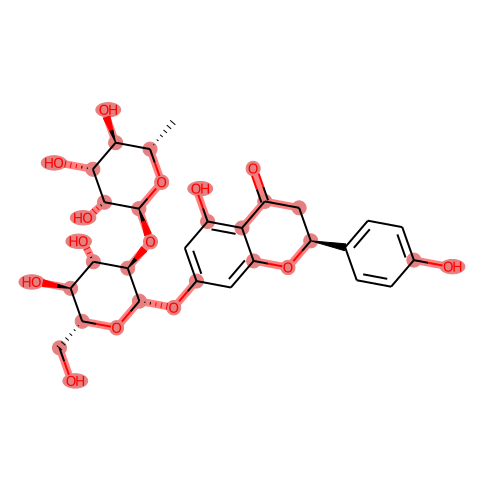

In [157]:
# Example SMILES string to highlight chemical groups in Naringin
smiles_string = 'C[C@H]1[C@@H]([C@H]([C@H]([C@@H](O1)O[C@@H]2[C@H]([C@@H]([C@H](O[C@H]2OC3=CC(=C4C(=O)C[C@H](OC4=C3)C5=CC=C(C=C5)O)O)CO)O)O)O)O)O'

# Highlight the chemical groups in the molecule
highlight_chemical_groups(smiles_string, smarts_patterns)

# The importance of Stereochemistry

A crucial aspect of organic chemistry is stereochemistry, which influences both the effects and chemical properties of molecules. Therefore, having a function that can count, identify, and even attribute chiral centers in a molecule is highly valuable. This functionality has been implemented in the next part of the code, relying on two independent components: one for counting chiral centers and another for printing the R and S configuration of the molecule's image.

It's important to note that in this code, we opted to attribute the stereogenic centers. This decision was made to optimize space in the final interface of the code, where only one function was deemed necessary. The identification of stereogenic centers was performed in the first function of the code, as demonstrated by the get_compound_info function.

Now, in addition to this functionality, the code can identify chiral centers on the molecule image. This last function, shown below, is a feature of RDKit and aids in visualizing chiral centers on the molecule.

In [1]:
# add code here for printing the centers on the molecule

# Properties of the interface
This program was designed to function as an extension, serving as an assistant during scientific work. It operates in the background and accesses the clipboard monitor, initiating the program automatically when a chemical name is copied. Subsequently, it provides the corresponding results without requiring manual input.

In [1]:
# Add the explanation here for all the attibutes of how the interface works how the images are printed, the formating the syling and the images @ElieAJ very important

In [ ]:
# Start a daemon thread that runs the clipboard monitoring function
threading.Thread(target=clipboard_monitor, daemon=True).start()
root.mainloop()

## Button to swap between graphics

During the analysis of the code's functionality in its interface, several attributes were added to enhance usability. One such addition is a button that allows users to toggle between two graphical representations of the molecule.

By clicking this button, users can switch between:

1. Highlighting the chemical groups in the molecule
2. Displaying the standard molecule graph with R/S configurations at chiral centers

This feature provides users with greater flexibility and ease of use when visualizing and analyzing molecular structures.


## URL of Pubchem link

To offer users the option for further analysis and information, the program also includes a PubChem link. This link directs users to additional information about the molecule of interest directly on the PubChem website. This feature provides users with a quick and convenient solution, eliminating the need to rely on conventional search engines for further research.

In [3]:
def open_url(url):
    webbrowser.open_new(url)